# Task 2

#### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from forex_python.converter import CurrencyRates

First, we load the dataset and take a look at it:

In [2]:
salaries_df = pd.read_csv('task2.csv')

salaries_df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


In [3]:
print('Rows before removing duplicates:', len(salaries_df))

print("Number of duplicated rows:", salaries_df.duplicated().sum())
salaries_df = salaries_df.drop_duplicates()

print('Rows after removing duplicates:', len(salaries_df))

Rows before removing duplicates: 13972
Number of duplicated rows: 5565
Rows after removing duplicates: 8407


The `describe()` method is applied to get a statistical summary of the data:

In [4]:
missing_data_per_column = salaries_df.isnull().sum()

print(missing_data_per_column)

Work_Year           0
Experience_Level    0
Employment_Type     0
Job_Title           0
Salary              0
Salary_Currency     0
Remote_Ratio        0
Company_Size        0
dtype: int64


In [5]:
unique_values = {col: salaries_df[col].unique() for col in salaries_df.columns}

print('Unique values in each column:\n')

for column, values in unique_values.items():
    print(f"{column}:\n {values}\n")

Unique values in each column:

Work_Year:
 [2024 2023 2022 2020 2021]

Experience_Level:
 ['Senior-Level' 'Mid-Level' 'Entry-Level' 'Executive-Level']

Employment_Type:
 ['Full-Time' 'Contract' 'Part-Time' 'Freelance']

Job_Title:
 ['AI Engineer' 'Machine Learning Engineer'
 'Business Intelligence Developer' 'Data Engineer' 'Data Scientist'
 'Cloud Database Engineer' 'Research Engineer' 'Data Analyst'
 'Machine Learning Scientist' 'Applied Scientist' 'Data Science Manager'
 'Research Scientist' 'Prompt Engineer' 'Data Science'
 'Data Science Consultant' 'Data Management Analyst' 'Research Analyst'
 'Data Operations Analyst' 'Data Management Consultant'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Data Quality Analyst' 'Data Architect' 'Data Manager' 'ML Engineer'
 'Robotics Software Engineer' 'Machine Learning Researcher' 'AI Architect'
 'Data DevOps Engineer' 'Business Intelligence' 'AI Software Engineer'
 'Data Integration Engineer' 'Data Operations Specialist' 'BI Analyst

In [6]:
salaries_df.describe()

,Work_Year,Salary,Remote_Ratio
count,8407.000000,8.407000e+03,8407.000000
mean,2023.090401,1.736066e+05,37.153563
std,0.777486,4.692652e+05,47.583260
min,2020.000000,1.400000e+04,0.000000
25%,2023.000000,9.600000e+04,0.000000
50%,2023.000000,1.400000e+05,0.000000
75%,2024.000000,1.885000e+05,100.000000
max,2024.000000,3.040000e+07,100.000000


### Currency Standardization

In [8]:
print('Currencies present in dataset:\n')
print(salaries_df['Salary_Currency'].unique())

Currencies present in dataset:

['USD' 'EUR' 'GBP' 'CHF' 'CAD' 'NZD' 'AUD' 'INR' 'PLN' 'BRL' 'PHP' 'TRY'
 'NOK' 'JPY' 'ZAR' 'HKD' 'SGD' 'ILS' 'THB' 'HUF' 'DKK' 'MXN' 'CLP']


In [9]:
unique_values_freq = salaries_df['Salary_Currency'].value_counts()
print(unique_values_freq)

USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
PLN       7
CHF       6
SGD       6
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
ZAR       1
HKD       1
ILS       1
PHP       1
NZD       1
MXN       1
CLP       1
Name: Salary_Currency, dtype: int64


In [20]:
salaries_df = salaries_df.groupby('Salary_Currency').filter(lambda x: len(x) >= 10)

salaries_df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


In [21]:
unique_values_freq = salaries_df['Salary_Currency'].value_counts()
print(unique_values_freq)

USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: Salary_Currency, dtype: int64


In [22]:
unique_currencies = salaries_df['Salary_Currency'].unique()

print(unique_currencies)

['USD' 'EUR' 'GBP' 'CAD' 'AUD' 'INR']


In [23]:
conversion_rates = {}

for currency in unique_currencies:
    try:
        conversion_rates[currency] = CurrencyRates().get_rate(currency, 'USD')
    except Exception as e:
        print(f"Error getting conversion rate for {currency}: {e}")

In [24]:
def apply_conversion(row):
    rate = conversion_rates.get(row['Salary_Currency'])
    if rate:
        return row['Salary'] * rate
    else:
        print('Error applying conversion rate for', row['Salary_Currency'])
        return None

In [25]:
salaries_df['Salary_USD'] = salaries_df.apply(apply_conversion, axis=1)

In [26]:
salaries_df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_USD
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large,90000.000000
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium,180500.000000
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium,96200.000000
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium,235000.000000
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium,175000.000000
...,...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large,412000.000000
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large,151000.000000
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S,105000.000000
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large,100000.000000


In [32]:
top_10_job_titles = salaries_df['Job_Title'].value_counts().head(10)

print('Top 10 Most Popular Job Titles:\n')
print(top_10_job_titles)

Top 10 Most Popular Job Titles:

Data Engineer                1584
Data Scientist               1548
Data Analyst                 1141
Machine Learning Engineer     797
Analytics Engineer            315
Research Scientist            265
Data Architect                224
Research Engineer             177
Data Science                  140
ML Engineer                   134
Name: Job_Title, dtype: int64


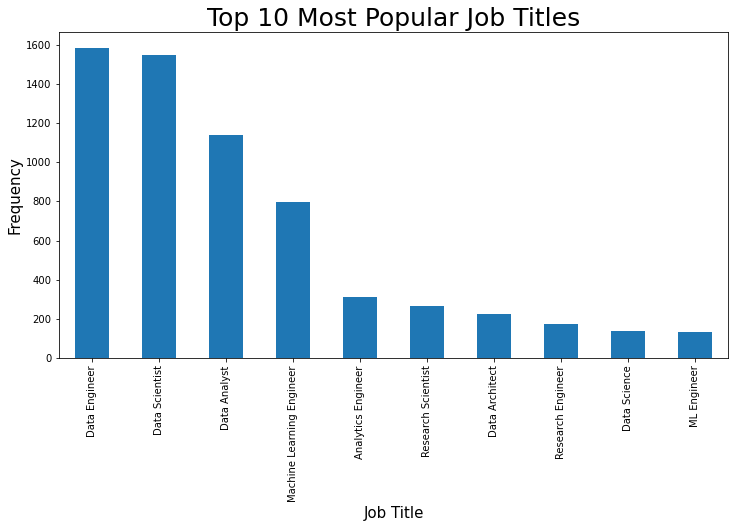

In [46]:
top_10_job_titles.plot(kind='bar', figsize=(12, 6))

plt.title('Top 10 Most Popular Job Titles', fontsize=25)
plt.xlabel('Job Title', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [35]:
top_10_highest_salaries = salaries_df['Salary'].nlargest(10)

print('Top 10 Highest Salaries:\n')
print('Index    Salary')
print(top_10_highest_salaries)

Top 10 Highest Salaries:

Index    Salary
13206    7500000
13971    7000000
13427    6000000
11723    5000000
5885     4950806
13865    4900000
12124    4460000
13298    4200000
9887     4000000
11996    4000000
Name: Salary, dtype: int64


plot for salaries (box plot looks good)